## Adjusting the Parameters of the Random Forest Model Using Cross-Validation and GridSearchCV

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../MCS/datasets/label_data.csv')
df = df.rename(columns={'label': 'target'})
X = df.drop('target', axis=1).values
y = df['target'].values

In [3]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
base_score = cross_val_score(rf, X, y, cv=5).mean()
print('Initial cross-validation score:', base_score)

Initial cross-validation score: 0.7985855892808201


## n_estimators

Max Score: 0.7979750455643861, n_estimators: 181


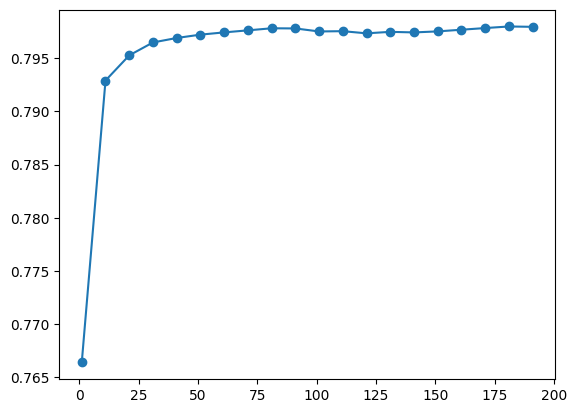

In [4]:
score_list = []

for i in range(0, 200, 10):
    rf = RandomForestClassifier(n_estimators=i+1, random_state=42, class_weight='balanced')
    score = cross_val_score(rf, X, y, cv=5).mean()
    score_list.append(score)
score_max = max(score_list)
print(f'Max Score: {score_max}, n_estimators: {score_list.index(score_max)*10+1}')

x = np.arange(1,201,10)
plt.subplot(111)
plt.plot(x, score_list, 'o-')
plt.show()

Max Score: 0.7986517180595519, n_estimators: 186


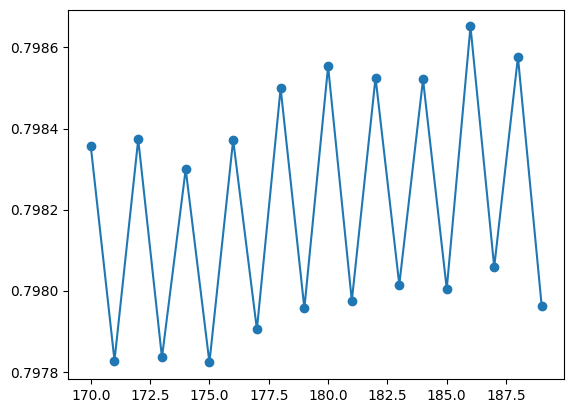

In [7]:
score_list = []
for i in range(170, 190):
    rf = RandomForestClassifier(n_estimators=i, random_state=42, class_weight='balanced')
    score = cross_val_score(rf, X, y, cv=5).mean()
    score_list.append(score)
score_max = max(score_list)
print(f'Max Score: {score_max}, n_estimators: {score_list.index(score_max)+170}')

x = np.arange(170, 190)
plt.subplot(111)
plt.plot(x, score_list,'o-')
plt.show()

In [11]:
print('Score changes:', score_max - base_score)

Score changes: 6.61287787317999e-05


## max_depth

In [14]:
rf = RandomForestClassifier(n_estimators=186, random_state=45)
param_grid = {'max_depth':np.arange(1, 20)}
GS = GridSearchCV(rf, param_grid, cv=5)
GS.fit(X, y)

best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)

{'max_depth': 1} 0.8607841388310679


In [15]:
print('Score changes:', best_score - base_score)

Score changes: 0.06219854955024773


## criterion

In [4]:
rf1 = RandomForestClassifier(n_estimators=186, max_depth=1, criterion='entropy', random_state=45)
score1 = cross_val_score(rf1, X, y, cv=5).mean()

rf2 = RandomForestClassifier(n_estimators=186, max_depth=1, criterion='log_loss', random_state=45)
score2 = cross_val_score(rf2, X, y, cv=5).mean()

print(f'Score changes:\nentropy: {score1 - base_score}, log_loss: {score2 - base_score}')

Score changes:
entropy: 0.06219854955024773, log_loss: 0.06219854955024773


In [5]:
print(score1, score2)

0.8607841388310679 0.8607841388310679


## Default Settings

In [11]:
model = RandomForestClassifier(
        class_weight='balanced',
        criterion='entropy',
    )
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    139930
           1       0.96      0.80      0.87     22631

    accuracy                           0.97    162561
   macro avg       0.97      0.90      0.93    162561
weighted avg       0.97      0.97      0.97    162561


In [12]:
model.n_estimators

100

In [14]:
print(model.max_depth)

None


In [16]:
print(model.random_state)

None


In [17]:
model.warm_start

False

Citation: https://zhuanlan.zhihu.com/p/126288078